In [2]:
import xarray 
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.cm as cm
jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0.2, 1.0, 256))  # skip darkest 20%
lighter_jet = ListedColormap(newcolors)

/tmp/ipykernel_3194873/1587183914.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', 256)


In [3]:
# List of NetCDF file paths
mon = 9
day = 15
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/p3_2019-'
file_paths = [f'{mon:02}-{day:02}-03600_day1_track_MUSICAv0_7km_CAMP2Ex.nc', f'{mon:02}-{day+1:02}-03600_day2_track_MUSICAv0_7km_CAMP2Ex.nc']

# Combine the file pattern with each file path
full_file_paths = [file_pattern + file_path for file_path in file_paths]

# Open multiple NetCDF files using open_mfdataset
ds = xarray.open_mfdataset(full_file_paths, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:     (datetime: 28161)
Coordinates:
  * datetime    (datetime) object '2019-09-15 21:55:07' ... '2019-09-16 05:44...
Data variables: (12/28)
    zco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    xco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    yco         (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    mlh_hsrl    (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    bc_sp2      (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    oa_ams      (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    ...          ...
    soaa2_mod   (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    nox_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    noy_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    so2_mod     (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    AODVIS_mod  (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>
    pblh_mod    (datetime) float64 dask.array<chunksize=(7493,), meta=np.ndarray>

In [4]:

variables = ['xco', 'yco','zco', 'pom_mod', 'soa_mod','so4_mod']
selected_data = ds[variables]
musicav0data = selected_data.to_dataframe().reset_index()
musicav0data['lon'] = musicav0data['xco']
musicav0data['lat'] = musicav0data['yco']
musicav0data['alt'] = musicav0data['zco']

In [5]:
en= 7000
st = 6000
musicav0data.iloc[st:en,:]

,datetime,xco,yco,zco,pom_mod,soa_mod,so4_mod,lon,lat,alt
6000,2019-09-15 23:35:07,117.906540,8.466646,5480.899902,0.530616,1.476270,0.212195,117.906540,8.466646,5480.899902
6001,2019-09-15 23:35:08,117.905258,8.465917,5481.100098,0.513106,1.519537,0.212197,117.905258,8.465917,5481.100098
6002,2019-09-15 23:35:09,117.903969,8.465188,5481.200195,0.513050,1.519429,0.212185,117.903969,8.465188,5481.200195
6003,2019-09-15 23:35:10,117.902687,8.464460,5481.399902,0.512958,1.519244,0.212163,117.902687,8.464460,5481.399902
6004,2019-09-15 23:35:11,117.901405,8.463731,5481.600098,0.512867,1.519058,0.212140,117.901405,8.463731,5481.600098
...,...,...,...,...,...,...,...,...,...,...
6995,2019-09-15 23:51:42,118.258324,7.589691,5484.500000,0.601197,1.507369,0.209887,118.258324,7.589691,5484.500000
6996,2019-09-15 23:51:43,118.259850,7.589346,5484.299805,0.601273,1.507507,0.209900,118.259850,7.589346,5484.299805
6997,2019-09-15 23:51:44,118.261375,7.589000,5484.299805,0.601263,1.507491,0.209898,118.261375,7.589000,5484.299805
6998,2019-09-15 23:51:45,118.262894,7.588655,5484.100098,0.601339,1.507629,0.209912,118.262894,7.588655,5484.100098


In [6]:
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

import numpy as np
# Use OpenStreetMap Tiles
osm_tiles = cimgt.OSM()
def plot_background(ax):
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor="None",edgecolor="k", linewidth=1)
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor = 'None', edgecolor='k')

ylo = 5#p3data['lat'].min()-0.25
yhi = 19#p3data['lat'].max()+0.25
xlo = 115#p3data['lon'].min()-0.25
xhi = 127#p3data['lon'].max()+0.25

def plot_ticks(ax):
    ax.set_yticks(np.arange(ylo,yhi,1), crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(xlo,xhi,1), crs = ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())

In [7]:
ylo = 5#p3data['lat'].min()-0.25
yhi = 19#p3data['lat'].max()+0.25
xlo = 115#p3data['lon'].min()-0.25
xhi = 127#p3data['lon'].max()+0.25

In [8]:
dat = '20190915'
dat1 = '2019-09-15-03600'
dat2 = '2019-09-16-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)
p3data_ds

<xarray.Dataset>
Dimensions:                       (time: 28161, bnds: 2, SMPS_Bin: 30,
                                   FIMS_Bin: 30, LAS_Bin: 26, APS_Bin: 13,
                                   WL_RSP1: 10, WL_SSFR: 12)
Coordinates:
  * time                          (time) datetime64[ns] 2019-09-15T21:55:07.5...
    lat                           (time) float32 ...
    lon                           (time) float32 ...
    alt                           (time) float32 ...
  * SMPS_Bin                      (SMPS_Bin) float32 0.003162 ... 0.08913
  * FIMS_Bin                      (FIMS_Bin) float32 10.0 11.52 ... 521.0 600.0
  * LAS_Bin                       (LAS_Bin) float32 0.1 0.1122 ... 2.512 3.162
  * APS_Bin                       (APS_Bin) float32 0.597 0.669 ... 4.496 5.661
  * WL_RSP1                       (WL_RSP1) float32 410.0 469.0 ... 1.064e+03
  * WL_SSFR                       (WL_SSFR) float32 415.9 439.2 ... 2.101e+03
Dimensions without coordinates: bnds
Data variables: (12/263)
    time_bnds                     (time, bnds) datetime64[ns] ...
    Pressure_Altitude             (time) float32 ...
    Radar_Altitude                (time) float32 ...
    Ground_Speed                  (time) float32 ...
    True_Air_Speed                (time) float32 ...
    Indicated_Air_Speed           (time) float32 ...
    ...                            ...
    kext_f                        (time, WL_RSP1) float32 ...
    kext_c                        (time, WL_RSP1) float32 ...
    p180_f                        (time, WL_RSP1) float32 ...
    p180_c                        (time, WL_RSP1) float32 ...
    Down_shortwave_Irradiance     (time, WL_SSFR) float32 ...
    Up_shortwave_Irradiance       (time, WL_SSFR) float32 ...
Attributes: (12/37)
    conventions:               CF-1.10
    data_use_guideline:        For responsible scientific use of the data set...
    summary:                   Merged Flight#20190915, on the P3B platform. D...
    id:                        10.5067/Airborne/CAMP2Ex_Merge_Data_1
    file_originator:           Michael Shook
    file_originator_contact:   michael.a.shook@nasa.gov
    ...                        ...
    geospatial_lat_max:        15.4044 degrees_north
    geospatial_lat_min:        7.0203 degrees_north
    geospatial_lon_max:        121.0429 degrees_east
    geospatial_lon_min:        117.3385 degrees_east
    time_coverage_resolution:  1.000000 seconds
    references:                Please see data source group attributes for: (...

In [9]:
variables = ['CO', 'CO2', 'SO4_Ave_IsoK_STP', 'Org_Ave_IsoK_STP', 'mz42_Ave_IsoK_STP', 'mz43_Ave_IsoK_STP', 'mz44_Ave_IsoK_STP', 'mz60_Ave_IsoK_STP']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()

In [10]:
en= 7000
st = 6000
p3data.iloc[st:en,:]

,time,CO,CO2,SO4_Ave_IsoK_STP,Org_Ave_IsoK_STP,mz42_Ave_IsoK_STP,mz43_Ave_IsoK_STP,mz44_Ave_IsoK_STP,mz60_Ave_IsoK_STP,lat,lon,alt
6000,2019-09-15 23:35:07.500,0.0998,NaN,0.201,0.541,0.020,0.113,0.027,0.014,8.466646,117.906540,5480.899902
6001,2019-09-15 23:35:08.500,NaN,409.720001,0.201,0.541,0.020,0.113,0.027,0.014,8.465917,117.905258,5481.100098
6002,2019-09-15 23:35:09.500,0.0973,NaN,0.201,0.541,0.020,0.113,0.027,0.014,8.465188,117.903969,5481.200195
6003,2019-09-15 23:35:10.500,0.0973,409.720001,0.201,0.541,0.020,0.113,0.027,0.014,8.464460,117.902687,5481.399902
6004,2019-09-15 23:35:11.500,0.0966,409.720001,0.201,0.541,0.020,0.113,0.027,0.014,8.463731,117.901405,5481.600098
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2019-09-15 23:51:42.500,0.1017,NaN,0.068,0.138,-0.027,-0.016,-0.027,0.033,7.589691,118.258324,5484.500000
6996,2019-09-15 23:51:43.500,NaN,409.679993,0.068,0.138,-0.027,-0.016,-0.027,0.033,7.589346,118.259850,5484.299805
6997,2019-09-15 23:51:44.500,0.1040,NaN,0.068,0.138,-0.027,-0.016,-0.027,0.033,7.589000,118.261375,5484.299805
6998,2019-09-15 23:51:45.500,0.1040,NaN,0.068,0.138,-0.027,-0.016,-0.027,0.033,7.588655,118.262894,5484.100098


In [11]:
p3data_xy = p3data[p3data['lat']<9]
musicav0data_xy = musicav0data[musicav0data['lat']<9]

In [12]:
p3data_xy

,time,CO,CO2,SO4_Ave_IsoK_STP,Org_Ave_IsoK_STP,mz42_Ave_IsoK_STP,mz43_Ave_IsoK_STP,mz44_Ave_IsoK_STP,mz60_Ave_IsoK_STP,lat,lon,alt
5405,2019-09-15 23:25:12.500,0.1006,409.630005,0.126,0.128,-0.050,0.042,-0.044,0.037,8.999861,118.606041,5480.799805
5406,2019-09-15 23:25:13.500,0.1006,NaN,0.126,0.128,-0.050,0.042,-0.044,0.037,8.999029,118.604828,5481.000000
5407,2019-09-15 23:25:14.500,0.1021,409.649994,0.126,0.128,-0.050,0.042,-0.044,0.037,8.998196,118.603615,5481.200195
5408,2019-09-15 23:25:15.500,0.1021,NaN,0.126,0.128,-0.050,0.042,-0.044,0.037,8.997363,118.602402,5481.200195
5409,2019-09-15 23:25:16.500,NaN,409.640015,0.126,0.128,-0.050,0.042,-0.044,0.037,8.996530,118.601189,5481.299805
...,...,...,...,...,...,...,...,...,...,...,...,...
19693,2019-09-16 03:23:20.500,NaN,409.630005,0.075,0.130,0.006,0.013,0.023,-0.015,8.994102,119.949112,6786.799805
19694,2019-09-16 03:23:21.500,0.1143,NaN,0.075,0.130,0.006,0.013,0.023,-0.015,8.995451,119.949615,6786.799805
19695,2019-09-16 03:23:22.500,NaN,409.630005,0.075,0.130,0.006,0.013,0.023,-0.015,8.996801,119.950127,6786.799805
19696,2019-09-16 03:23:23.500,0.1253,NaN,0.075,0.130,0.006,0.013,0.023,-0.015,8.998149,119.950630,6786.799805


In [13]:

musicav0data_xy = musicav0data_xy[p3data_xy['Org_Ave_IsoK_STP'].notna()]
p3data_xy = p3data_xy[p3data_xy['Org_Ave_IsoK_STP'].notna()]

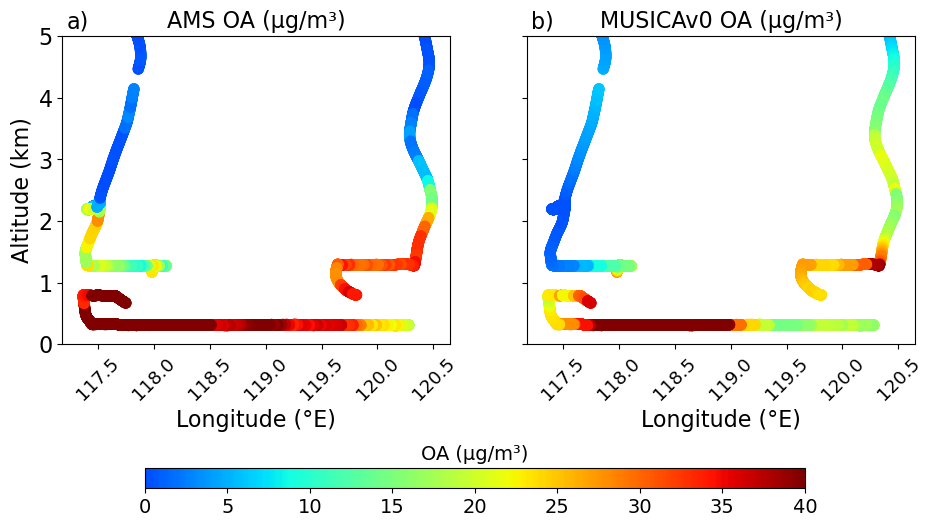

In [14]:


fig = plt.figure(figsize=(11, 4))  # Adjust the figure size for better layout
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1],wspace=0.2)  # Define 1 row, 2 columns

pla_proj = ccrs.PlateCarree()
ax1 = fig.add_subplot(gs[0])
ax1.text(0.01, 1.01, f'a)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')

sc = ax1.scatter( p3data_xy['lon'], p3data_xy['alt']/1000, c= p3data_xy['Org_Ave_IsoK_STP'], vmin=0, vmax=40.0, cmap=lighter_jet, s=50)
plt.ylim(0,5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=13, rotation=45)
plt.title('AMS OA (µg/m³)',fontsize=16)

plt.ylabel('Altitude (km)',fontsize=16)
plt.xlabel('Longitude (°E)',fontsize=16)

ax1 = fig.add_subplot(gs[1])
ax1.text(0.01, 1.01, f'b)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')

sc = ax1.scatter( musicav0data_xy['lon'], musicav0data_xy['alt']/1000, c= musicav0data_xy['pom_mod'] + musicav0data_xy['soa_mod'], vmin=0, vmax=40.0, cmap=lighter_jet, s=50)


plt.ylim(0,5)
plt.title('MUSICAv0 OA (µg/m³)',fontsize=16)
#ax1.text(117, 5300, 'b)', fontsize=14, color='black')
plt.ylabel('Altitude (m)',fontsize=16, color='white')
plt.xlabel('Longitude (°E)',fontsize=16)
plt.yticks(fontsize=16, color='white')
plt.xticks(fontsize=13, rotation=45)
cbar_ax = fig.add_axes([0.2, -.25, 0.6, 0.05])  # Adjust position as needed
cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
plt.title(f'OA (µg/m³)',fontsize=14)
cbar.ax.tick_params(labelsize=14)    
# Show plot
plt.savefig(f'img/Figure10_AMSPaper_.png',dpi=300, bbox_inches='tight')


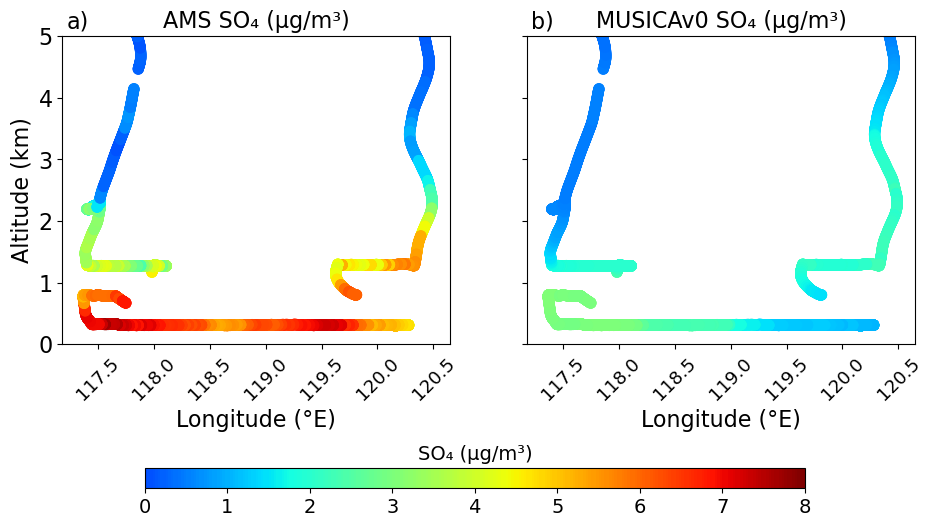

In [15]:
fig = plt.figure(figsize=(11, 4))  # Adjust the figure size for better layout
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1],wspace=0.2)  # Define 1 row, 2 columns

pla_proj = ccrs.PlateCarree()
ax1 = fig.add_subplot(gs[0])
ax1.text(0.01, 1.01, f'a)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')

sc = ax1.scatter( p3data_xy['lon'], p3data_xy['alt']/1000, c= p3data_xy['SO4_Ave_IsoK_STP'], vmin=0, vmax=8, cmap=lighter_jet, s=50)
plt.ylim(0,5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=13, rotation=45)
plt.title('AMS SO₄ (µg/m³)',fontsize=16)
plt.ylabel('Altitude (km)',fontsize=16)
plt.xlabel('Longitude (°E)',fontsize=16)

ax1 = fig.add_subplot(gs[1])
ax1.text(0.01, 1.01, f'b)', transform=ax1.transAxes,
            fontsize=16,  va='bottom', ha='left')
sc = ax1.scatter( musicav0data_xy['lon'], musicav0data_xy['alt']/1000, c= musicav0data_xy['so4_mod'], vmin=0, vmax=8, cmap=lighter_jet, s=50)

plt.ylim(0,5)
plt.title('MUSICAv0 SO₄ (µg/m³)',fontsize=16)
#ax1.text(117, 5300, 'b)', fontsize=14, color='black')
plt.ylabel('Altitude (m)',fontsize=16, color='white')
plt.xlabel('Longitude (°E)',fontsize=16)
plt.yticks(fontsize=16, color='white')
plt.xticks(fontsize=13, rotation=45)
cbar_ax = fig.add_axes([0.2, -.25, 0.6, 0.05])  # Adjust position as needed
cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
plt.title(f'SO₄ (µg/m³)',fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.savefig(f'img/Figure12_AMSPaper_.png',dpi=300, bbox_inches='tight')
